In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
def compute_auc(spd, accuracy):
    sorted_inds = np.argsort(spd)
    spd_ = np.hstack([min(spd), spd[sorted_inds], 1])
    accuracy_ = np.hstack([0, accuracy[sorted_inds]/100, max(accuracy)/100])
    auc_ours = metrics.auc(spd_, accuracy_)
    return auc_ours

In [3]:
folder = 'results'

In [4]:
dataset = 'CommunitiesCrimeClassification'

SPOD_FKDE = []
SPOD_ours = []
SPOD_ours_linear = []

auc_FKDE_ = []
auc_ours_ = []
auc_ours_linear = []

auc_zafar_ = []
auc_sinkhorn_ = []
accuracy_FKDE = []
accuracy_ours = []
accuracy_ours_linear = []

accuracy_zafar = []
SPOD_zafar = []

accuracy_Sinkhorn = []
SPOD_Sinkhorn = []

times_ours, times_ours_linear, times_FKDE, times_zafar, times_Sinkhorn = [], [], [], [], []
MMD = 0 if dataset == 'Adult' else 1
for seed in range(10):
    df_FKDE = pd.read_csv('{}/FKDE/{}_FKDE_{}_test.csv'.format(folder, dataset, seed), index_col=0)
    SPOD_FKDE.append(np.array(df_FKDE.equal_opportunity))
    accuracy_FKDE.append(np.array(df_FKDE.accuracy))
    df_FKDE = pd.read_csv('{}/FKDE/{}_FKDE_{}_train.csv'.format(folder, dataset, seed), index_col=0)
    times_FKDE.append(df_FKDE.time)
    auc_FKDE_.append(compute_auc(SPOD_FKDE[seed], accuracy_FKDE[seed]))
    
    if MMD:
        df_Sinkhorn = pd.read_csv('{}/NN_MMD_sinkhorn/{}_NN_Sinkhorn_AinX_test_{}.csv'.format(folder,dataset, seed), index_col=0)
        SPOD_Sinkhorn.append(np.array(df_Sinkhorn.equal_opportunity))
        accuracy_Sinkhorn.append(np.array(df_Sinkhorn.accuracy))
        df_Sinkhorn = pd.read_csv('{}/NN_MMD_sinkhorn/{}_NN_Sinkhorn_AinX_train_{}.csv'.format(folder,dataset, seed), index_col=0)
        times_Sinkhorn.append(df_Sinkhorn.time)
        auc_sinkhorn_.append(compute_auc(SPOD_Sinkhorn[seed], accuracy_Sinkhorn[seed]))
    
    if dataset == 'Adult':
        df_zafar = pd.read_csv('{}/zafar/{}_zafar_{}_test.csv'.format(folder,dataset, seed), index_col=0)
        SPOD_zafar.append(np.array(df_zafar.equal_opportunity))
        accuracy_zafar.append(np.array(df_zafar.accuracy))
        df_zafar = pd.read_csv('{}/zafar/{}_zafar_{}_train.csv'.format(folder, dataset, seed), index_col=0)
        times_zafar.append(df_zafar.time)
        auc_zafar_.append(compute_auc(SPOD_zafar[seed], accuracy_zafar[seed]))
    else:
        df_zafar = pd.read_csv('{}/zafar/{}_zafar_{}_test.csv'.format(folder, dataset, seed), index_col=0)
        SPOD_zafar.append(np.array(df_zafar.equal_opportunity))
        accuracy_zafar.append(np.array(df_zafar.accuracy))
        df_zafar = pd.read_csv('{}/zafar/{}_zafar_{}_train.csv'.format(folder,dataset, seed), index_col=0)
        times_zafar.append(df_zafar.time)
        auc_zafar_.append(compute_auc(SPOD_zafar[seed], accuracy_zafar[seed]))
    df_ours = pd.read_csv('{}/NN_energy/{}_NN_AinX_test_{}.csv'.format(folder,dataset, seed), index_col=0)
    SPOD_ours.append(np.array(df_ours.equal_opportunity))
    accuracy_ours.append(np.array(df_ours.accuracy))
    df_ours = pd.read_csv('{}/NN_energy/{}_NN_AinX_train_{}.csv'.format(folder,dataset, seed), index_col=0)
    times_ours.append(df_ours.time)
    auc_ours_.append(compute_auc(SPOD_ours[seed], accuracy_ours[seed]))
    ###Ours linear
    df_ours_linear = pd.read_csv('{}/NN_energy/{}_linear_AinX_test_{}.csv'.format(folder,dataset, seed), index_col=0)
    if len(df_ours_linear)>0:
        SPOD_ours_linear.append(np.array(df_ours_linear.statistical_parity_classification))
        accuracy_ours_linear.append(np.array(df_ours_linear.accuracy))
        df_ours_linear = pd.read_csv('{}/NN_energy/{}_linear_AinX_train_{}.csv'.format(folder, dataset, seed), index_col=0)
        times_ours_linear.append(df_ours_linear.time)
        auc_ours_linear.append(compute_auc(SPOD_ours_linear[seed], accuracy_ours_linear[seed]))

In [5]:
SPOD_FKDE_ave = np.array(SPOD_FKDE).mean(axis=0)
SPOD_ours_ave = np.array(SPOD_ours).mean(axis=0)
accuracy_FKDE_ave = np.array(accuracy_FKDE).mean(axis=0) 
accuracy_ours_ave = np.array(accuracy_ours).mean(axis=0)

#SPOD_ours_linear_ave = np.array(SPOD_ours_linear).mean(axis=0)
#accuracy_ours_linear_ave = np.array(accuracy_ours_linear).mean(axis=0)

SPOD_zafar_ave = np.array(SPOD_zafar).mean(axis=0)
accuracy_zafar_ave = np.array(accuracy_zafar).mean(axis=0)
if MMD:
    SPOD_Sinkhorn_ave = np.array(SPOD_Sinkhorn).mean(axis=0)
    accuracy_Sinkhorn_ave = np.array(accuracy_Sinkhorn).mean(axis=0) 
    times_Sinkhorn = np.abs(times_Sinkhorn).mean()
    sorted_SPOD_sinkhorn = np.argsort(SPOD_Sinkhorn_ave)
    auc_sinkhorn = np.array(auc_sinkhorn_).mean()
else:
    auc_sinkhorn = '-'

In [6]:
auc_ours = np.array(auc_ours_).mean()
#auc_ours_linear = np.array(auc_ours_linear).mean()


auc_zafar = np.array(auc_zafar_).mean()
auc_FKDE = np.array(auc_FKDE_).mean()

In [7]:
auc_ours_linear

[0.8114621072653807,
 0.8040021144785555,
 0.8273902203578074,
 0.8121853269224322,
 0.8047826581319542,
 0.8118609710458161,
 0.8035666660961229,
 0.8118189579023581,
 0.7971276124263942,
 0.8364835774373438]

In [8]:
print('ZAFAR: {}$\pm${}'.format(np.round(np.mean(auc_zafar_), 3), np.round(np.std(auc_zafar_)/np.sqrt(10),3)))
print('Cho et al: {}$\pm${}'.format(np.round(np.mean(auc_FKDE_), 3), np.round(np.std(auc_FKDE_)/np.sqrt(10),3)))
if MMD:
    print('Oneta et al: {}$\pm${}'.format(np.round(np.mean(auc_sinkhorn_), 3), np.round(np.std(auc_sinkhorn_)/np.sqrt(10),3)))
print('MFL: {}$\pm${}'.format(np.round(np.mean(auc_ours_), 3), np.round(np.std(auc_ours_)/np.sqrt(10),3)))
print('MFL linear {}$\pm${}'.format(np.round(np.mean(auc_ours_linear), 3), np.round(np.std(auc_ours_linear)/np.sqrt(10),3)))


ZAFAR: 0.749$\pm$0.006
Cho et al: 0.821$\pm$0.006
Oneta et al: 0.829$\pm$0.01
MFL: 0.83$\pm$0.008
MFL linear 0.812$\pm$0.004


In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rcParams.update({'font.size': 15})

AUC values: 
 FKDE: 0.8209917963298686, ours: 0.8297240467825411, Oneto: 0.829394020824054
AUC values: 
 Zafar: 0.7487094210621885
Training Time--> FKDE: 16.37982006931305 secs, ours: 2.415129035949707 secs, Zafar: 26.117169758796692, ourslinear: 2.0931477632522584
Oneto: 152.3578565607071


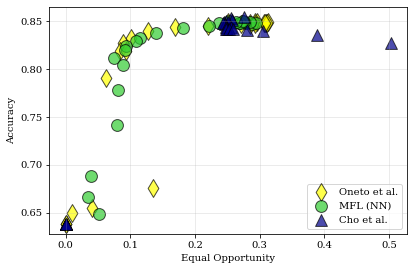

In [10]:
plt.close('all')
s_ = 140



if MMD:
    plt.scatter(SPOD_Sinkhorn_ave, accuracy_Sinkhorn_ave/100,
                c=colors['yellow'], 
                label='Oneto et al.',
                marker='d', s=s_+20, edgecolors='k', alpha=.7)
plt.scatter(SPOD_ours_ave, accuracy_ours_ave/100, 
            c=colors['limegreen'],
            label='MFL (NN)', marker='o', s=s_, edgecolors='k', alpha=.7)
plt.scatter(SPOD_FKDE_ave, accuracy_FKDE_ave/100,
            c=colors['darkblue'], 
            label='Cho et al.',
            marker='^', s=s_, edgecolors='k', alpha=.7)


plt.xlabel('Equal Opportunity')
plt.ylabel('Accuracy')
plt.legend()
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rcParams.update({'font.size': 15})
plt.grid(alpha=.3)
plt.tight_layout()
plt.savefig('plots/'+dataset + '.pdf')

times_ours = np.abs(times_ours).mean()
times_ours_linear = np.abs(times_ours_linear).mean()
times_FKDE = np.abs(times_FKDE).mean()
times_zafar = np.abs(times_zafar).mean()
if MMD:
    times_oneto = np.abs(times_Sinkhorn).mean()

print('AUC values: \n FKDE: {}, ours: {}, Oneto: {}'.format(auc_FKDE, auc_ours, auc_sinkhorn))
print('AUC values: \n Zafar: {}'.format(auc_zafar))
print('Training Time--> FKDE: {} secs, ours: {} secs, Zafar: {}, ourslinear: {}'.format(times_FKDE, times_ours, times_zafar, times_ours_linear))
if MMD:
    print('Oneto: {}'.format(times_oneto))